In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
filepath=r"D:\netflix_titles.csv"
file_path=r"D:\netflix_revenue_updated.csv"

subs = pd.read_csv(file_path)
titles = pd.read_csv(filepath)


In [4]:
subs.head()
titles.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
titles['date_added'] = pd.to_datetime(titles['date_added'],errors='coerce')
titles = titles.dropna(subset=['date_added'])


In [7]:
titles['Year'] = titles['date_added'].dt.year
titles['Quarter'] = titles['date_added'].dt.quarter
subs['Quarter'] = pd.to_datetime(subs['Date']).dt.quarter
subs['Year'] = pd.to_datetime(subs['Date']).dt.year


C:\Users\Radhika\AppData\Local\Temp\ipykernel_7744\368001412.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  subs['Quarter'] = pd.to_datetime(subs['Date']).dt.quarter
C:\Users\Radhika\AppData\Local\Temp\ipykernel_7744\368001412.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  subs['Year'] = pd.to_datetime(subs['Date']).dt.year


In [8]:
content_added = titles.groupby(['Year', 'Quarter']).size().reset_index(name='Content_Added')


In [15]:
subs['Date'] = pd.to_datetime(subs['Date'], dayfirst=True)
subs['Year'] = subs['Date'].dt.year
subs['Quarter'] = subs['Date'].dt.quarter

# Rename column (removing extra space)
subs.rename(columns={'Netflix Streaming Memberships ': 'Subscribers'}, inplace=True)

# Keep only necessary columns
subs_cleaned = subs[['Year', 'Quarter', 'Subscribers']]


In [18]:
titles = pd.read_csv(filepath)
titles['date_added'] = pd.to_datetime(titles['date_added'],errors='coerce')
titles = titles.dropna(subset=['date_added'])

titles['Year'] = titles['date_added'].dt.year
titles['Quarter'] = titles['date_added'].dt.quarter


In [19]:
df_content_quarterly = titles.groupby(['Year', 'Quarter']).size().reset_index(name='Content_Added')


In [20]:
df_merged = pd.merge(df_content_quarterly, subs_cleaned, on=['Year', 'Quarter'])


In [22]:
df_merged.head(10)

,Year,Quarter,Content_Added,Subscribers
0,2019,1,467,148863000
1,2019,2,468,151562000
2,2019,3,408,158334000
3,2019,4,656,167090000
4,2020,1,455,182856000
5,2020,2,490,192947000
6,2020,3,443,195151000
7,2020,4,490,203663000
8,2021,1,353,207639000
9,2021,2,527,209180000


CONTENT ADDED OVER TIME

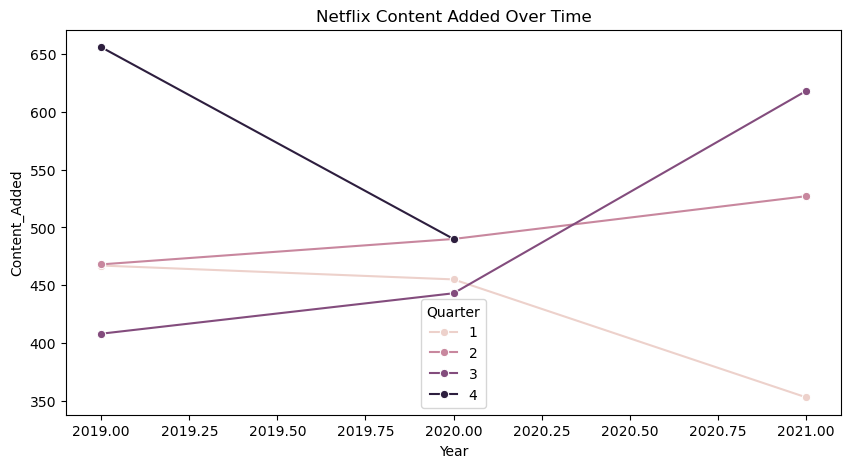

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_merged, x='Year', y='Content_Added', marker='o', hue='Quarter')
plt.title("Netflix Content Added Over Time")
plt.show()

SUBSCRIBERS OVER TIME

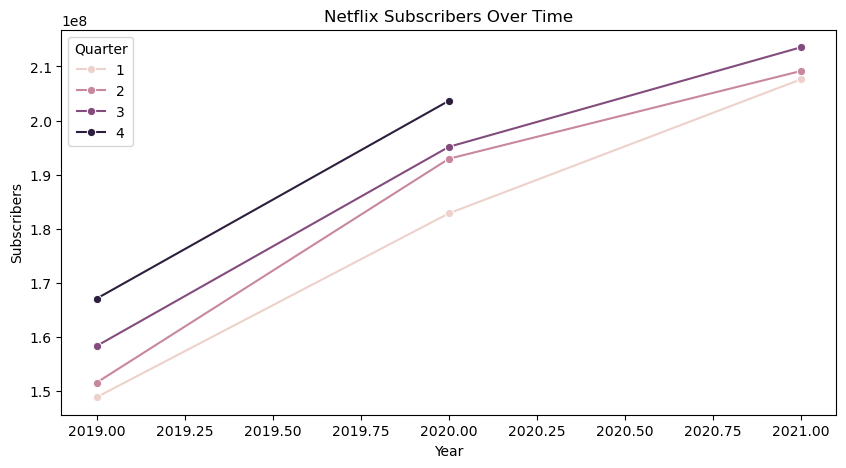

In [24]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_merged, x='Year', y='Subscribers', marker='o', hue='Quarter')
plt.title("Netflix Subscribers Over Time")
plt.show()


ANALYZE THE CORRELATON

In [25]:
correlation = df_merged['Subscribers'].corr(df_merged['Content_Added'])
print("Correlation:", correlation)


Correlation: 0.08657343766455207
